In [17]:
import numpy as np
import tensorflow as tf

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import tensorflow as tf
from sklearn.metrics import mean_squared_error

import os
import sys

import data_processing as dp

sys.path.append(os.path.abspath("../.."))



data = pd.read_csv('spx_vhs.csv')

data = data.drop(columns=['high','low','time','vel_15'])

#close = data['close'].values




#X, y = dp.make_prll_trgt(data=data.values, index=3,offset=0)
y = dp.make_vhs_target(data.values,close_index=0,s_index=6,mode='breakout')


data = data.drop(columns=['close'])


print(data.columns)
X = data.values

y*=5000

print(y.max(), y.min())

#X = np.delete(X, 6, axis=1)
'''
use_lstm = True

scaler = StandardScaler()
X = scaler.fit_transform(X)

print((570 - scaler.mean_[1]) / scaler.scale_[1])
print((900 - scaler.mean_[1]) / scaler.scale_[1])'''


Index(['volume', 'ToD', 'DoW', 'v_60_.08', 'h_60_.08', 's_60_.08', 'vel_60'], dtype='object')
84.61852 -94.848724


'\nuse_lstm = True\n\nscaler = StandardScaler()\nX = scaler.fit_transform(X)\n\nprint((570 - scaler.mean_[1]) / scaler.scale_[1])\nprint((900 - scaler.mean_[1]) / scaler.scale_[1])'

In [11]:
import numpy as np
from hmmlearn.hmm import GaussianHMM

# ----------------------------
# 1) Your data: 
#    X should be shape (n_samples, n_features)
#    e.g. intraday returns + volatility signals
# ----------------------------
# X = np.load("your_feature_array.npy")

# ----------------------------
# 2) Choose number of hidden states K
#    You can sweep K=2…6 and pick via BIC/AIC
# ----------------------------
K = 8

# ----------------------------
# 3) Instantiate and fit
# ----------------------------
model = GaussianHMM(
    n_components=K,
    covariance_type="diag",   # allows arbitrary covariance per state
    n_iter=200,               # EM iterations
    verbose=True
)
model.fit(X)  # runs Baum–Welch under the hood

# ----------------------------
# 4) Inspect learned parameters
# ----------------------------
print("Transition matrix:\n", model.transmat_)
print("Means of each hidden state:\n", model.means_)
print("Covariances of each state:\n", model.covars_)

# ----------------------------
# 5) Decode the most likely state sequence
# ----------------------------
hidden_states = model.predict(X)        # shape (n_samples,)
posteriors   = model.predict_proba(X)   # shape (n_samples, K)

         1 -15701999.34522244             +nan
         2 -14390262.32453140 +1311737.02069103
         3 -14183896.12594510 +206366.19858630
         4 -13994613.61488883 +189282.51105627
         5 -13874494.99134279 +120118.62354604
         6 -13819660.60387179  +54834.38747099
         7 -13777427.91025853  +42232.69361326
         8 -13749631.05733684  +27796.85292169
         9 -13722752.53708001  +26878.52025683
        10 -13701114.13560138  +21638.40147863
        11 -13684339.54490535  +16774.59069603
        12 -13670573.05795405  +13766.48695129
        13 -13646730.28090805  +23842.77704601
        14 -13586432.36997447  +60297.91093358
        15 -13565057.67740259  +21374.69257187
        16 -13555436.15624850   +9621.52115409
        17 -13548715.47338451   +6720.68286399
        18 -13543682.03740948   +5033.43597503
        19 -13539586.05461778   +4095.98279170
        20 -13536174.99528661   +3411.05933117
        21 -13533194.52342324   +2980.47186337
        22 -

Transition matrix:
 [[9.38669278e-001 2.12797405e-002 1.48219694e-323 3.01847182e-005
  2.44079258e-003 3.07643281e-002 4.06452970e-004 6.40922319e-003]
 [4.68415643e-002 7.86453386e-001 4.92842930e-003 4.32470339e-002
  1.15189070e-002 9.36679239e-005 1.05448200e-001 1.46881151e-003]
 [1.43215131e-004 6.36592250e-003 9.15503743e-001 5.22195654e-160
  3.24257714e-267 3.08784087e-002 1.89638053e-002 2.81449050e-002]
 [0.00000000e+000 2.16918186e-002 2.01658001e-131 9.39765179e-001
  2.76988125e-003 2.77141325e-002 1.64019551e-003 6.41879313e-003]
 [0.00000000e+000 1.51101475e-002 8.26683351e-307 1.04490031e-002
  9.50096334e-001 2.43445156e-002 1.87440114e-048 7.77065710e-013]
 [1.16318224e-001 0.00000000e+000 4.28237328e-002 8.78679880e-002
  3.90918348e-002 6.20174684e-001 0.00000000e+000 9.37235364e-002]
 [6.82441942e-003 1.09681182e-001 2.06987261e-002 3.08654968e-003
  2.96476194e-086 6.78852247e-004 8.36415798e-001 2.26144721e-002]
 [1.26442730e-002 0.00000000e+000 1.06550045e-002

### comparing models by AIC / BIC

In [31]:
import math

def count_hmm_params(n_states, n_features, cov_type="full"):
    # initial state probs: (n_states - 1) free
    p_init = n_states - 1
    # transition matrix: n_states*(n_states - 1) free
    p_trans = n_states * (n_states - 1)
    # emission means: n_states * n_features
    p_means = n_states * n_features
    # emission covariances:
    if cov_type == "full":
        # each covariance is a symmetric matrix: d*(d+1)/2
        p_covs = n_states * (n_features * (n_features + 1) / 2)
    elif cov_type == "diag":
        p_covs = n_states * n_features
    else:  # “spherical”
        p_covs = n_states
    return int(p_init + p_trans + p_means + p_covs)

def fit_and_score_aic_bic(X, K_list, cov_type="full"):
    N, d = X.shape
    results = []
    for K in K_list:
        model = GaussianHMM(n_components=K,
                            covariance_type=cov_type,
                            n_iter=100).fit(X)
        logL = model.score(X)
        p    = count_hmm_params(K, d, cov_type)
        aic  = 2*p - 2*logL
        bic  = p*math.log(N) - 2*logL
        results.append((K, logL, p, aic, bic))
    return results

# Example usage:
Ks = [2, 4, 6, 8]
scores = fit_and_score_aic_bic(X, Ks, cov_type="full")
print(" K │   logL    │   p   │    AIC    │    BIC")
for K,logL,p,aic,bic in scores:
    print(f"{K:2d} │ {logL:8.1f} │ {p:5d} │ {aic:9.1f} │ {bic:9.1f}")


Model is not converging.  Current: -13002026.775955329 is not greater than -13002024.821451988. Delta is -1.9545033406466246


 K │   logL    │   p   │    AIC    │    BIC
 2 │ -14265495.6 │    73 │ 28531137.1 │ 28531935.6
 4 │ -13733508.8 │   155 │ 27467327.6 │ 27469023.0
 6 │ -13571893.2 │   245 │ 27144276.3 │ 27146956.2
 8 │ -13002021.8 │   343 │ 26004729.6 │ 26008481.4


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(X, shuffle=False, test_size=0.2)
model.fit(X_train)
train_ll = model.score(X_train)
test_ll  = model.score(X_test)
print(f"Train LL = {train_ll:.1f}, Test LL = {test_ll:.1f}")

### one step ahead predictive log-likelihood

In [9]:
from hmmlearn import utils

# Precompute emission log‐probabilities
log_emlik = model._compute_log_likelihood(X)  # shape (T, K)

# Run a single forward pass, keeping track of normalizers
T, K = log_emlik.shape
# alpha[t,i] ∝ p(x1:t, state=i)
alpha = np.zeros((T, K))
c     = np.zeros(T)            # normalization constants

# Initialization
alpha[0] = np.exp(model.startprob_ + log_emlik[0])
c[0]     = alpha[0].sum()
alpha[0] /= c[0]

# Recursion
for t in range(1, T):
    # unnormalized
    alpha[t] = (alpha[t-1] @ model.transmat_) * np.exp(log_emlik[t])
    c[t]     = alpha[t].sum()
    alpha[t] /= c[t]

# The one‑step predictive log‑likelihood is sum(log c[1:])
one_step_ll = np.sum(np.log(c[1:]))
print(f"One-step-ahead log-likelihood: {one_step_ll:.1f}")


One-step-ahead log-likelihood: -13052923.8


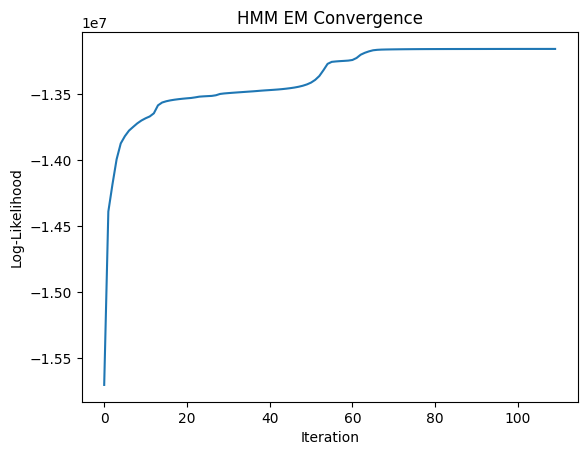

In [12]:
import matplotlib.pyplot as plt

# after fitting:
hist = model.monitor_.history          # list of log‑likelihoods per iteration
impr = np.diff(hist)                   # you could also inspect these Δs

plt.figure()
plt.plot(hist)
plt.title("HMM EM Convergence")
plt.xlabel("Iteration")
plt.ylabel("Log-Likelihood")
plt.show()

In [18]:
# Infer hidden states from features
hidden_states = model.predict(X)

# Assume `log_rets` is a precomputed NumPy array of log returns
# of shape (n_samples,) aligned with rows of X.
# Example:
#   log_rets = np.log(prices[1:] / prices[:-1])

state_stats = {}
for k in range(model.n_components):
    idx = np.where(hidden_states == k)[0]
    if idx.size == 0:
        continue

    # Log returns for observations in state k
    rets_k = y[idx]

    # Performance metrics
    win_rate = np.mean(rets_k > 0)          # fraction of positive log returns
    mean_log_ret = np.mean(rets_k)          # average log return
    vol_log_ret  = np.std(rets_k)           # volatility (std of log returns)

    state_stats[k] = {
        "count":    idx.size,
        "win_rate": win_rate,
        "mean_log_ret": mean_log_ret,
        "vol_log_ret":  vol_log_ret
    }

# Print summary table
print("State │ Count │ Win% │ AvgLogRet │ VolLogRet")
for k, stats in state_stats.items():
    print(
        f"{k:>2d}   │ {stats['count']:5d} │ "
        f"{stats['win_rate']*100:4.1f}% │ "
        f"{stats['mean_log_ret']:.4f}   │ "
        f"{stats['vol_log_ret']:.4f}"
    )


State │ Count │ Win% │ AvgLogRet │ VolLogRet
 0   │ 97439 │ 46.8% │ 0.0340   │ 2.3396
 1   │ 42173 │ 47.2% │ 0.2882   │ 6.7794
 2   │ 32046 │ 52.0% │ 0.3606   │ 11.0316
 3   │ 84410 │ 49.3% │ 0.0070   │ 4.3000
 4   │ 39789 │ 47.1% │ 0.0172   │ 2.5863
 5   │ 26387 │ 49.1% │ -0.0212   │ 6.3562
 6   │ 38898 │ 47.9% │ 0.2320   │ 7.1124
 7   │ 54780 │ 50.3% │ 0.0326   │ 6.6769
